# Google Play Store reviews scraping and Text Analytics

Reviews scraping from Google Play Store.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

In [2]:
# Define and configure Google Play Scraper library
hk_users_reviews = reviews_all(
    'com.aiahk.idirect',
    sleep_milliseconds=0,
    lang='chi', # Default language is 'en', set language to Chinese.
    country='hk', # Default country is 'us', set country to Hong Kong.
    sort=Sort.NEWEST, # Default is Sort.MOST_RELEVANT.
)

In [3]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(hk_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFekmxaWidwZRtrMs9UO5zHptsk9YTYuF8f7TN...,Yvonne Yu,https://play-lh.googleusercontent.com/a-/AOh14...,It was hanged when I want to use coupon 😢,3,0,4.346,2021-09-04 20:12:19,None,NaT
1,gp:AOqpTOFX0ZKC5V9pD9q8bB1xH_d4N4n90m-ApJMuPgE...,ALICE CHOU,https://play-lh.googleusercontent.com/a-/AOh14...,"very useful, can get info I need any time any ...",5,0,4.346,2021-09-03 23:09:46,None,NaT
2,gp:AOqpTOH39hv45Jyq_7KZNo8-q335gUTJn_gj-2lqLRP...,2018かみこうち,https://play-lh.googleusercontent.com/a-/AOh14...,user friendly !,5,0,4.346,2021-09-03 10:01:51,None,NaT
3,gp:AOqpTOGJdQ7b2nRU_A7R7EZ-VGNvQpcAxGjJklTE8ID...,Allie Lee,https://play-lh.googleusercontent.com/a/AATXAJ...,easy to claim,5,0,4.346,2021-09-01 21:17:21,Thank you for your feedback. We hope you would...,2021-09-02 12:15:19
4,gp:AOqpTOECC8omUAqb-MK-6NQazI8thIXZGKe2iisLY69...,Wesley Lam,https://play-lh.googleusercontent.com/a-/AOh14...,Way too many clicks to dig out useful informat...,1,1,4.345,2021-08-26 12:09:18,We are very concerned about the situation you ...,2021-08-27 12:10:01


In [4]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              250 non-null    object        
 1   userName              250 non-null    object        
 2   userImage             250 non-null    object        
 3   content               250 non-null    object        
 4   score                 250 non-null    int64         
 5   thumbsUpCount         250 non-null    int64         
 6   reviewCreatedVersion  213 non-null    object        
 7   at                    250 non-null    datetime64[ns]
 8   replyContent          199 non-null    object        
 9   repliedAt             199 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 19.7+ KB


In [5]:
# Count number of review scores
df_reviews['score'].value_counts()

1    155
5     62
2     15
4      9
3      9
Name: score, dtype: int64

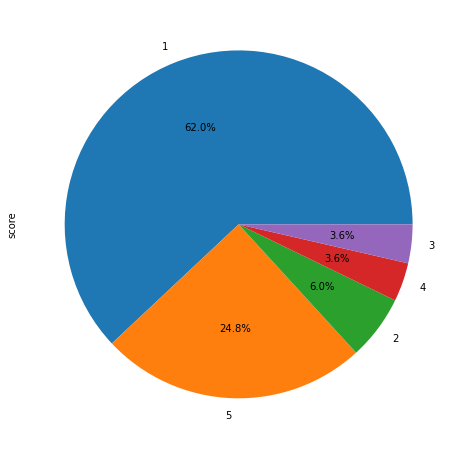

In [6]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [7]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [8]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,It was hanged when I want to use coupon 😢,3
1,"very useful, can get info I need any time any ...",5
2,user friendly !,5
3,easy to claim,5
4,Way too many clicks to dig out useful informat...,1


Text Analytics (Sentiment Analysis) of Reviews Content dataframe.

In [9]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [10]:
# Define the service key and endpoint of Azure Text Analytics
# key = "PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_SERVICE_KEY"
#endpoint = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_INSTANCE_NAME.cognitiveservices.azure.com/"

In [12]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: It was hanged when I want to use coupon 😢
Review Content Sentiment: neutral
Review Content Score: 3
Review Content: very useful, can get info I need any time any day and easy to use
Review Content Sentiment: positive
Review Content Score: 5
Review Content: user friendly !
Review Content Sentiment: neutral
Review Content Score: 5
Review Content: easy to claim
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Way too many clicks to dig out useful information. Just give me good old simple table view showing key information like balance, gain, loss etc
Review Content Sentiment: positive
Review Content Score: 1
Review Content: Really horrible User interface. Feels very clunky. The UX designer should be fired.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: so easy to use
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Its not working
Review Content Sentiment: neutral
Review Content Score: 1
Review 

Review Content Sentiment: positive
Review Content Score: 5
Review Content: Fingerprint login doesn't work and it does not manage to remember our pw
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Not stable and responsive time is longer than other apps
Review Content Sentiment: neutral
Review Content Score: 3
Review Content: Easy to use, good!
Review Content Sentiment: positive
Review Content Score: 4
Review Content: User friendly
Review Content Sentiment: neutral
Review Content Score: 5
Review Content: Extremely slow even no response.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Slow. Unstable. Quit abormlly usuallu.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: problematic app it say my valid isn't valid, but it show my account information under such misleading message.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Cannot load the vitality page ....
Review Content Sentiment:

Review Content Sentiment: positive
Review Content Score: 2
Review Content: Horrible cheap app. Submit buttons doesnt work. Cant recover my pin number. You guys are swimming in money, meanwhile you have a 50 dolar app.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Absolutely useless. I previously managed my personal insurance and investments via this app and my mpf on the desktop website. Received an email advising my mpf statement is ready and can view it at the desktop website. It simply tells you to download the app (I already have it). When I click on the app there is no way that I can add the mpf account to my existing insurance products, heck out auto logs me into my personal accounts with no option to add mpf accounts unless I delete the app/reset.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: All pages are blank after logging in.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: It freezes after upda

Review Content Sentiment: positive
Review Content Score: 4
Review Content: Every time it showed system down and out of service.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Heavy drain on battery; keeps running in background, which is not necessary. Server is down most of the time. Should not push the implementation when the app is not ready.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: claim submission is much faster now.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Its ok
Review Content Sentiment: neutral
Review Content Score: 5
Review Content: I have never seen a worse app and wish I could rate ZEOR star!
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Poor app Makes you mad and frustrated
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: SHxx App keep running make you phone hot, what the hXll of this app
Review Content Sentiment: neutral
Review 

Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Sucks! low response, get stucked always
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Always loading!
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: Disaster recovery drill? The app is a disaster.
Review Content Sentiment: neutral
Review Content Score: 1
Review Content: The app crashed and stopped everytime I opened it since the last update.
Review Content Sentiment: neutral
Review Content Score: 2
Review Content: Stuck when open the app, cannot even get into the login page, very bad
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Very slow, extremely NOT user friendly, the layout is very complicated. Loads of advertisements. Most of the time cannot log in. The pop up message tells you the system is being upgraded or under disaster recovery but the dates in the pop up message is 10 to 14 days ago. Sometimes the pop up messages tells

In [13]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

neutral     146
positive     74
negative     27
mixed         3
Name: sentiment, dtype: int64

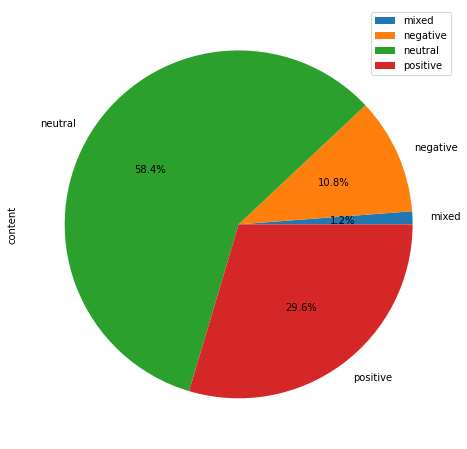

In [14]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [15]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                  3
negative   1                 23
           2                  2
           3                  1
           5                  1
neutral    1                106
           2                 11
           3                  8
           4                  3
           5                 18
positive   1                 23
           2                  2
           4                  6
           5                 43
Name: content, dtype: int64

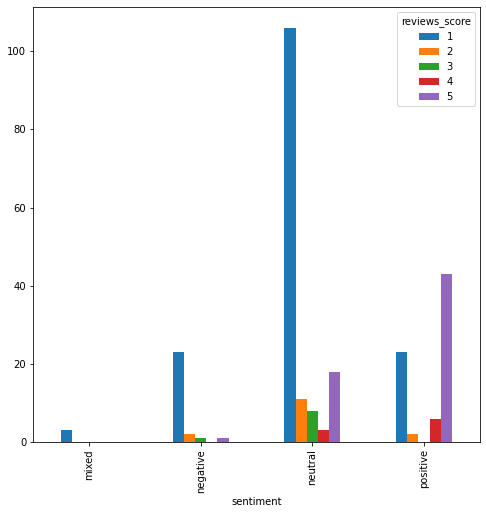

In [34]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

From observation, neutral sentiment in review content would most likely be giving lowest review score. Let's doing some more statistical analysis below.

In [17]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        250 non-null    object
 1   sentiment      250 non-null    object
 2   reviews_score  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [28]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [29]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [30]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [31]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        250 non-null    object
 1   sentiment      250 non-null    int64 
 2   reviews_score  250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [32]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                106
           2                 11
           3                  8
           4                  3
           5                 18
1          1                 23
           2                  2
           4                  6
           5                 43
2          1                 23
           2                  2
           3                  1
           5                  1
3          1                  3
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.
* 0 = Neutral
* 1 = Negative
* 2 = Positive
* 3 = Mixed

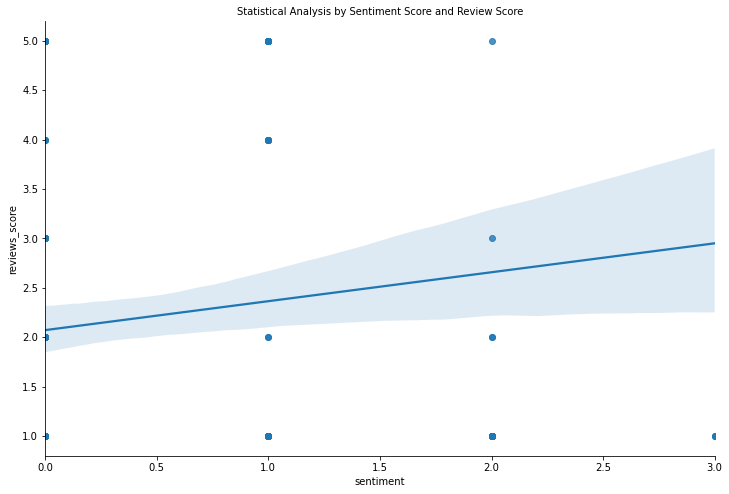

In [33]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization
* Positive sentiment (2) from review content is trending to higher reivew score.
* Negative sentiment (1) from review content is trending to lower review score.
* Neutral sentiment (0) from review content is trending to lower review score.
* In other word, lower review score is trending to Neutral sentiment (0).
* From this observation, if sentiment is negative to neutral, user would give lower review score.